# _**Bibliotecas Python**_

## Instalação de Pacotes

In [304]:
%pip show statsmodels

Name: statsmodels
Version: 0.12.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: None
Author-email: None
License: BSD License
Location: c:\users\murilo.ribeiro\appdata\local\continuum\anaconda3\lib\site-packages
Requires: scipy, patsy, pandas, numpy
Required-by: pmdarima
Note: you may need to restart the kernel to use updated packages.


In [305]:
# Atualizando o pacote statsmodels para a versão 0.12.2 para a qual aplicamos o SEASONAL DECOMPOSE
#%pip install statsmodels==0.12.2

In [306]:
%pip install pmdarima --user

Note: you may need to restart the kernel to use updated packages.


In [307]:
!pip show pandas

Name: pandas
Version: 1.2.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\users\murilo.ribeiro\appdata\local\continuum\anaconda3\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: statsmodels, seaborn, pmdarima


In [308]:
#!pip install pandas==1.2.1 --user

## Importando as Bibliotecas

In [309]:
# Vinculando endereços de drive para query
path = 'C:/Users/murilo.ribeiro/EUROCHEM FERTILIZANTES TOCANTINS/S&OP - Documentos/08. Bases/ML Database/'
file1 = 'CSV_deliveries.csv'
file2 = 'CSV_production.csv'

In [310]:
# Importanto as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando pacotes necessários
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.forecasting.theta import ThetaModel
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Ignorar mensagens de erro
import warnings
warnings.filterwarnings('ignore')

# Definindo o tamanho e estilo dos gráficos
plt.rc("figure",figsize=(15,8))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style("whitegrid")

# _**Base de dados**_

## Leitura de Dataframes

In [311]:
## Importação da base de dados de entregas (CSV_deliveries.csv) do ORACLE
df1 = pd.read_csv(path+file1)
df1['Deliveries'].fillna(0,inplace=True)

## Dataframe global
df1['Date'] = pd.to_datetime(df1['Date'])
dm1 = df1.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1 = pd.DataFrame(dm1)

# Tratando o outlier ocorrido durante a implantação do Oracle
dm1.loc['2021-04-30'] = dm1.loc['2020-04-30']

In [312]:
isinstance(dm1, pd.DataFrame)

True

In [313]:
## Importação da base de dados de entregas (CSV_production.csv) do ORACLE
df2 = pd.read_csv(path+file2)
df2['Quantity'].fillna(0,inplace=True)

## Dataframe global
df2['Date'] = pd.to_datetime(df2['Date'])
dm2 = df2.groupby(pd.Grouper(key='Date', freq='M'))['Quantity'].sum()
#dm2.index = dm2.index.strftime('%B')
dm2 = pd.DataFrame(dm2)

## Plotar as entregas mensais
#sns.set_style('ticks')
#mProduction = sns.lineplot(data = dm2, x=dm2.index, y = dm2['Quantity'], color = 'blue')
##mProduction.set_title('Produção Mensal (em toneladas)', fontsize = 15)
#mProduction.set_ylabel('Produção (ton)', fontsize = 13)
#mProduction.set_xlabel('Meses', fontsize = 13)
#plt.show()

## Dataframes de Entregas

In [314]:
# CSV_deliveries.csv
# Fazendo tratamento da base de entregas (faturamento) para criar DataFrames para cada unidade produtora

# Criando dataframes para Porto Nacional

df1_PNO = df1[(df1['pUnit'] == 'PNO')]

dm1_PNO = df1_PNO.copy()
dm1_PNO['Date'] = pd.to_datetime(df1_PNO['Date'])
dm1_PNO = df1_PNO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_PNO = pd.DataFrame(dm1_PNO)

df1_PNO = df1_PNO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_PNO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_PNO = df1_PNO.append(mask_PNO)
df1_PNO['Date'] = pd.to_datetime(df1_PNO['Date'])
df1_PNO = df1_PNO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_PNO.index.min(), end = df1_PNO.index.max(), freq='D')
#df1_PNO = df1_PNO.reindex(idx)

df1_PNO[df1_PNO['Deliveries'] < 0] = 0
df1_PNO = df1_PNO.fillna(0)

# Criando dataframes para São Luís

df1_SLO = df1[(df1['pUnit'] == 'SLO')]

dm1_SLO = df1_SLO.copy()
dm1_SLO['Date'] = pd.to_datetime(df1_SLO['Date'])
dm1_SLO = df1_SLO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_SLO = pd.DataFrame(dm1_SLO)

df1_SLO = df1_SLO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_SLO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_SLO = df1_SLO.append(mask_SLO)
df1_SLO['Date'] = pd.to_datetime(df1_SLO['Date'])
df1_SLO = df1_SLO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_SLO.index.min(), end = df1_SLO.index.max(), freq='D')
#df1_SLO = df1_SLO.reindex(idx)

df1_SLO[df1_SLO['Deliveries'] < 0] = 0
df1_SLO = df1_SLO.fillna(0)

# Criando dataframes para Querência

df1_QRO = df1[(df1['pUnit'] == 'QRO')]

dm1_QRO = df1_QRO.copy()
dm1_QRO['Date'] = pd.to_datetime(df1_QRO['Date'])
dm1_QRO = df1_QRO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_QRO = pd.DataFrame(dm1_QRO)

df1_QRO = df1_QRO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_QRO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_QRO = df1_QRO.append(mask_QRO)
df1_QRO['Date'] = pd.to_datetime(df1_QRO['Date'])
df1_QRO = df1_QRO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_QRO.index.min(), end = df1_QRO.index.max(), freq='D')
#df1_QRO = df1_QRO.reindex(idx)

df1_QRO[df1_QRO['Deliveries'] < 0] = 0
df1_QRO = df1_QRO.fillna(0)

# Criando dataframes para Barcarena

df1_BCO = df1[(df1['pUnit'] == 'BCO')]

dm1_BCO = df1_BCO.copy()
dm1_BCO['Date'] = pd.to_datetime(df1_BCO['Date'])
dm1_BCO = df1_BCO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_BCO = pd.DataFrame(dm1_BCO)

df1_BCO = df1_BCO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_BCO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_BCO = df1_BCO.append(mask_BCO)
df1_BCO['Date'] = pd.to_datetime(df1_BCO['Date'])
df1_BCO = df1_BCO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_BCO.index.min(), end = df1_BCO.index.max(), freq='D')
#df1_BCO = df1_BCO.reindex(idx)

df1_BCO[df1_BCO['Deliveries'] < 0] = 0
df1_BCO = df1_BCO.fillna(0)

# Criando dataframes para Fertimaxi

df1_FTX = df1[(df1['pUnit'] == 'FTX')]

dm1_FTX = df1_FTX.copy()
dm1_FTX['Date'] = pd.to_datetime(df1_FTX['Date'])
dm1_FTX = df1_FTX.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_FTX = pd.DataFrame(dm1_FTX)

df1_FTX = df1_FTX.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_FTX = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_FTX = df1_FTX.append(mask_FTX)
df1_FTX['Date'] = pd.to_datetime(df1_FTX['Date'])
df1_FTX = df1_FTX.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_FTX.index.min(), end = df1_FTX.index.max(), freq='D')
#df1_FTX = df1_FTX.reindex(idx)

df1_FTX[df1_FTX['Deliveries'] < 0] = 0
df1_FTX = df1_FTX.fillna(0)

# Criando dataframes para Intermarítima

df1_INT = df1[(df1['pUnit'] == 'INT')]

dm1_INT = df1_INT.copy()
dm1_INT['Date'] = pd.to_datetime(df1_INT['Date'])
dm1_INT = df1_INT.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_INT = pd.DataFrame(dm1_INT)

df1_INT = df1_INT.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_INT = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_INT = df1_INT.append(mask_INT)
df1_INT['Date'] = pd.to_datetime(df1_INT['Date'])
df1_INT = df1_INT.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_INT.index.min(), end = df1_INT.index.max(), freq='D')
#df1_INT = df1_INT.reindex(idx)

df1_INT[df1_INT['Deliveries'] < 0] = 0
df1_INT = df1_INT.fillna(0)

# Criando dataframes para Sinop

df1_SNO = df1[(df1['pUnit'] == 'SNO')]

dm1_SNO = df1_SNO.copy()
dm1_SNO['Date'] = pd.to_datetime(df1_SNO['Date'])
dm1_SNO = df1_SNO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_SNO = pd.DataFrame(dm1_SNO)

df1_SNO = df1_SNO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_SNO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_SNO = df1_SNO.append(mask_SNO)
df1_SNO['Date'] = pd.to_datetime(df1_SNO['Date'])
df1_SNO = df1_SNO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_SNO.index.min(), end = df1_SNO.index.max(), freq='D')
#df1_SNO = df1_SNO.reindex(idx)

df1_SNO[df1_SNO['Deliveries'] < 0] = 0
df1_SNO = df1_SNO.fillna(0)

# Criando dataframes para Rondonópolis

df1_RNO = df1[(df1['pUnit'] == 'RNO')]

dm1_RNO = df1_RNO.copy()
dm1_RNO['Date'] = pd.to_datetime(df1_RNO['Date'])
dm1_RNO = df1_RNO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_RNO = pd.DataFrame(dm1_RNO)

df1_RNO = df1_RNO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_RNO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_RNO = df1_RNO.append(mask_RNO)
df1_RNO['Date'] = pd.to_datetime(df1_RNO['Date'])
df1_RNO = df1_RNO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_RNO.index.min(), end = df1_RNO.index.max(), freq='D')
#df1_RNO = df1_RNO.reindex(idx)

df1_RNO[df1_RNO['Deliveries'] < 0] = 0
df1_RNO = df1_RNO.fillna(0)

# Criando dataframes para Catalão

df1_CTO = df1[(df1['pUnit'] == 'CTO')]

dm1_CTO = df1_CTO.copy()
dm1_CTO['Date'] = pd.to_datetime(df1_CTO['Date'])
dm1_CTO = df1_CTO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_CTO = pd.DataFrame(dm1_CTO)

df1_CTO = df1_CTO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_CTO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_CTO = df1_CTO.append(mask_CTO)
df1_CTO['Date'] = pd.to_datetime(df1_CTO['Date'])
df1_CTO = df1_CTO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_CTO.index.min(), end = df1_CTO.index.max(), freq='D')
#df1_CTO = df1_CTO.reindex(idx)

df1_CTO[df1_CTO['Deliveries'] < 0] = 0
df1_CTO = df1_CTO.fillna(0)

# Criando dataframes para Paranaguá

df1_PGU = df1[(df1['pUnit'] == 'PGU')]

dm1_PGU = df1_PGU.copy()
dm1_PGU['Date'] = pd.to_datetime(df1_PGU['Date'])
dm1_PGU = df1_PGU.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_PGU = pd.DataFrame(dm1_PGU)

df1_PGU = df1_PGU.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_PGU = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_PGU = df1_PGU.append(mask_PGU)
df1_PGU['Date'] = pd.to_datetime(df1_PGU['Date'])
df1_PGU = df1_PGU.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_PGU.index.min(), end = df1_PGU.index.max(), freq='D')
#df1_PGU = df1_PGU.reindex(idx)

df1_PGU[df1_PGU['Deliveries'] < 0] = 0
df1_PGU = df1_PGU.fillna(0)

# Criando dataframes para Araguari

df1_ARO = df1[(df1['pUnit'] == 'ARO')]

dm1_ARO = df1_ARO.copy()
dm1_ARO['Date'] = pd.to_datetime(df1_ARO['Date'])
dm1_ARO = df1_ARO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_ARO = pd.DataFrame(dm1_ARO)

df1_ARO = df1_ARO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_ARO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_ARO = df1_ARO.append(mask_ARO)
df1_ARO['Date'] = pd.to_datetime(df1_ARO['Date'])
df1_ARO = df1_ARO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_ARO.index.min(), end = df1_ARO.index.max(), freq='D')
#df1_ARO = df1_ARO.reindex(idx)

df1_ARO[df1_ARO['Deliveries'] < 0] = 0
df1_ARO = df1_ARO.fillna(0)

## Dataframes de Produção

In [315]:
## Definir quais são as Matérias-Primas de interesse
MP1 = 'KCL'
MP2 = 'UREIA'
MP3 = 'MAP'
MP4 = 'TSP'
MP5 = 'SSP'

In [316]:
# CSV_prodution.csv
# Fazendo tratamento da base de produção (consumo de matéria-prima) para criar DataFrames para cada unidade produtora


# Criando DataFrames para Porto Nacional
df2_PNO = df2[(df2['pUnit'] == 'PNO')]
df2_PNO_MP1 = df2_PNO[(df2_PNO['ProductGenDesc'] == MP1)]
df2_PNO_MP2 = df2_PNO[(df2_PNO['ProductGenDesc'] == MP2)]
df2_PNO_MP3 = df2_PNO[(df2_PNO['ProductGenDesc'] == MP3)]
df2_PNO_MP4 = df2_PNO[(df2_PNO['ProductGenDesc'] == MP4)]
df2_PNO_MP5 = df2_PNO[(df2_PNO['ProductGenDesc'] == MP5)]

dm2_PNO_MP1 = df2_PNO_MP1.copy()
dm2_PNO_MP1 = dm2_PNO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PNO_MP1 = pd.DataFrame(dm2_PNO_MP1)
df2_PNO_MP1 = df2_PNO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PNO_MP1 = pd.DataFrame(df2_PNO_MP1)

dm2_PNO_MP2 = df2_PNO_MP2.copy()
dm2_PNO_MP2 = dm2_PNO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PNO_MP2 = pd.DataFrame(dm2_PNO_MP2)
df2_PNO_MP2 = df2_PNO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PNO_MP2 = pd.DataFrame(df2_PNO_MP2)

dm2_PNO_MP3 = df2_PNO_MP3.copy()
dm2_PNO_MP3 = dm2_PNO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PNO_MP3 = pd.DataFrame(dm2_PNO_MP3)
df2_PNO_MP3 = df2_PNO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PNO_MP3 = pd.DataFrame(df2_PNO_MP3)

dm2_PNO_MP4 = df2_PNO_MP4.copy()
dm2_PNO_MP4 = dm2_PNO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PNO_MP4 = pd.DataFrame(dm2_PNO_MP4)
df2_PNO_MP4 = df2_PNO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PNO_MP4 = pd.DataFrame(df2_PNO_MP4)

dm2_PNO_MP5 = df2_PNO_MP5.copy()
dm2_PNO_MP5 = dm2_PNO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PNO_MP5 = pd.DataFrame(dm2_PNO_MP5)
df2_PNO_MP5 = df2_PNO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PNO_MP5 = pd.DataFrame(df2_PNO_MP5)

# Criando DataFrames para São Luís
df2_SLO = df2[(df2['pUnit'] == 'SLO')]
df2_SLO_MP1 = df2_SLO[(df2_SLO['ProductGenDesc'] == MP1)]
df2_SLO_MP2 = df2_SLO[(df2_SLO['ProductGenDesc'] == MP2)]
df2_SLO_MP3 = df2_SLO[(df2_SLO['ProductGenDesc'] == MP3)]
df2_SLO_MP4 = df2_SLO[(df2_SLO['ProductGenDesc'] == MP4)]
df2_SLO_MP5 = df2_SLO[(df2_SLO['ProductGenDesc'] == MP5)]

dm2_SLO_MP1 = df2_SLO_MP1.copy()
dm2_SLO_MP1 = dm2_SLO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SLO_MP1 = pd.DataFrame(dm2_SLO_MP1)
df2_SLO_MP1 = df2_SLO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SLO_MP1 = pd.DataFrame(df2_SLO_MP1)

dm2_SLO_MP2 = df2_SLO_MP2.copy()
dm2_SLO_MP2 = dm2_SLO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SLO_MP2 = pd.DataFrame(dm2_SLO_MP2)
df2_SLO_MP2 = df2_SLO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SLO_MP2 = pd.DataFrame(df2_SLO_MP2)

dm2_SLO_MP3 = df2_SLO_MP3.copy()
dm2_SLO_MP3 = dm2_SLO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SLO_MP3 = pd.DataFrame(dm2_SLO_MP3)
df2_SLO_MP3 = df2_SLO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SLO_MP3 = pd.DataFrame(df2_SLO_MP3)

dm2_SLO_MP4 = df2_SLO_MP4.copy()
dm2_SLO_MP4 = dm2_SLO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SLO_MP4 = pd.DataFrame(dm2_SLO_MP4)
df2_SLO_MP4 = df2_SLO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SLO_MP4 = pd.DataFrame(df2_SLO_MP4)

dm2_SLO_MP5 = df2_SLO_MP5.copy()
dm2_SLO_MP5 = dm2_SLO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SLO_MP5 = pd.DataFrame(dm2_SLO_MP5)
df2_SLO_MP5 = df2_SLO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SLO_MP5 = pd.DataFrame(df2_SLO_MP5)

# Criando DataFrames para Querência
df2_QRO = df2[(df2['pUnit'] == 'QRO')]
df2_QRO_MP1 = df2_QRO[(df2_QRO['ProductGenDesc'] == MP1)]
df2_QRO_MP2 = df2_QRO[(df2_QRO['ProductGenDesc'] == MP2)]
df2_QRO_MP3 = df2_QRO[(df2_QRO['ProductGenDesc'] == MP3)]
df2_QRO_MP4 = df2_QRO[(df2_QRO['ProductGenDesc'] == MP4)]
df2_QRO_MP5 = df2_QRO[(df2_QRO['ProductGenDesc'] == MP5)]

dm2_QRO_MP1 = df2_QRO_MP1.copy()
dm2_QRO_MP1 = dm2_QRO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_QRO_MP1 = pd.DataFrame(dm2_QRO_MP1)
df2_QRO_MP1 = df2_QRO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_QRO_MP1 = pd.DataFrame(df2_QRO_MP1)

dm2_QRO_MP2 = df2_QRO_MP2.copy()
dm2_QRO_MP2 = dm2_QRO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_QRO_MP2 = pd.DataFrame(dm2_QRO_MP2)
df2_QRO_MP2 = df2_QRO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_QRO_MP2 = pd.DataFrame(df2_QRO_MP2)

dm2_QRO_MP3 = df2_QRO_MP3.copy()
dm2_QRO_MP3 = dm2_QRO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_QRO_MP3 = pd.DataFrame(dm2_QRO_MP3)
df2_QRO_MP3 = df2_QRO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_QRO_MP3 = pd.DataFrame(df2_QRO_MP3)

dm2_QRO_MP4 = df2_QRO_MP4.copy()
dm2_QRO_MP4 = dm2_QRO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_QRO_MP4 = pd.DataFrame(dm2_QRO_MP4)
df2_QRO_MP4 = df2_QRO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_QRO_MP4 = pd.DataFrame(df2_QRO_MP4)

dm2_QRO_MP5 = df2_QRO_MP5.copy()
dm2_QRO_MP5 = dm2_QRO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_QRO_MP5 = pd.DataFrame(dm2_QRO_MP5)
df2_QRO_MP5 = df2_QRO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_QRO_MP5 = pd.DataFrame(df2_QRO_MP5)

# Criando DataFrames para Barcarena
df2_BCO = df2[(df2['pUnit'] == 'BCO')]
df2_BCO_MP1 = df2_BCO[(df2_BCO['ProductGenDesc'] == MP1)]
df2_BCO_MP2 = df2_BCO[(df2_BCO['ProductGenDesc'] == MP2)]
df2_BCO_MP3 = df2_BCO[(df2_BCO['ProductGenDesc'] == MP3)]
df2_BCO_MP4 = df2_BCO[(df2_BCO['ProductGenDesc'] == MP4)]
df2_BCO_MP5 = df2_BCO[(df2_BCO['ProductGenDesc'] == MP5)]

dm2_BCO_MP1 = df2_BCO_MP1.copy()
dm2_BCO_MP1 = dm2_BCO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_BCO_MP1 = pd.DataFrame(dm2_BCO_MP1)
df2_BCO_MP1 = df2_BCO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_BCO_MP1 = pd.DataFrame(df2_BCO_MP1)

dm2_BCO_MP2 = df2_BCO_MP2.copy()
dm2_BCO_MP2 = dm2_BCO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_BCO_MP2 = pd.DataFrame(dm2_BCO_MP2)
df2_BCO_MP2 = df2_BCO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_BCO_MP2 = pd.DataFrame(df2_BCO_MP2)

dm2_BCO_MP3 = df2_BCO_MP3.copy()
dm2_BCO_MP3 = dm2_BCO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_BCO_MP3 = pd.DataFrame(dm2_BCO_MP3)
df2_BCO_MP3 = df2_BCO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_BCO_MP3 = pd.DataFrame(df2_BCO_MP3)

dm2_BCO_MP4 = df2_BCO_MP4.copy()
dm2_BCO_MP4 = dm2_BCO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_BCO_MP4 = pd.DataFrame(dm2_BCO_MP4)
df2_BCO_MP4 = df2_BCO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_BCO_MP4 = pd.DataFrame(df2_BCO_MP4)

dm2_BCO_MP5 = df2_BCO_MP5.copy()
dm2_BCO_MP5 = dm2_BCO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_BCO_MP5 = pd.DataFrame(dm2_BCO_MP5)
df2_BCO_MP5 = df2_BCO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_BCO_MP5 = pd.DataFrame(df2_BCO_MP5)

# Criando DataFrames para Fertimaxi
df2_FTX = df2[(df2['pUnit'] == 'FTX')]
df2_FTX_MP1 = df2_FTX[(df2_FTX['ProductGenDesc'] == MP1)]
df2_FTX_MP2 = df2_FTX[(df2_FTX['ProductGenDesc'] == MP2)]
df2_FTX_MP3 = df2_FTX[(df2_FTX['ProductGenDesc'] == MP3)]
df2_FTX_MP4 = df2_FTX[(df2_FTX['ProductGenDesc'] == MP4)]
df2_FTX_MP5 = df2_FTX[(df2_FTX['ProductGenDesc'] == MP5)]

dm2_FTX_MP1 = df2_FTX_MP1.copy()
dm2_FTX_MP1 = dm2_FTX_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_FTX_MP1 = pd.DataFrame(dm2_FTX_MP1)
df2_FTX_MP1 = df2_FTX_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_FTX_MP1 = pd.DataFrame(df2_FTX_MP1)

dm2_FTX_MP2 = df2_FTX_MP2.copy()
dm2_FTX_MP2 = dm2_FTX_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_FTX_MP2 = pd.DataFrame(dm2_FTX_MP2)
df2_FTX_MP2 = df2_FTX_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_FTX_MP2 = pd.DataFrame(df2_FTX_MP2)

dm2_FTX_MP3 = df2_FTX_MP3.copy()
dm2_FTX_MP3 = dm2_FTX_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_FTX_MP3 = pd.DataFrame(dm2_FTX_MP3)
df2_FTX_MP3 = df2_FTX_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_FTX_MP3 = pd.DataFrame(df2_FTX_MP3)

dm2_FTX_MP4 = df2_FTX_MP4.copy()
dm2_FTX_MP4 = dm2_FTX_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_FTX_MP4 = pd.DataFrame(dm2_FTX_MP4)
df2_FTX_MP4 = df2_FTX_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_FTX_MP4 = pd.DataFrame(df2_FTX_MP4)

dm2_FTX_MP5 = df2_FTX_MP5.copy()
dm2_FTX_MP5 = dm2_FTX_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_FTX_MP5 = pd.DataFrame(dm2_FTX_MP5)
df2_FTX_MP5 = df2_FTX_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_FTX_MP5 = pd.DataFrame(df2_FTX_MP5)

# Criando DataFrames para Intermarítima
df2_INT = df2[(df2['pUnit'] == 'INT')]
df2_INT_MP1 = df2_INT[(df2_INT['ProductGenDesc'] == MP1)]
df2_INT_MP2 = df2_INT[(df2_INT['ProductGenDesc'] == MP2)]
df2_INT_MP3 = df2_INT[(df2_INT['ProductGenDesc'] == MP3)]
df2_INT_MP4 = df2_INT[(df2_INT['ProductGenDesc'] == MP4)]
df2_INT_MP5 = df2_INT[(df2_INT['ProductGenDesc'] == MP5)]

dm2_INT_MP1 = df2_INT_MP1.copy()
dm2_INT_MP1 = dm2_INT_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_INT_MP1 = pd.DataFrame(dm2_INT_MP1)
df2_INT_MP1 = df2_INT_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_INT_MP1 = pd.DataFrame(df2_INT_MP1)

dm2_INT_MP2 = df2_INT_MP2.copy()
dm2_INT_MP2 = dm2_INT_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_INT_MP2 = pd.DataFrame(dm2_INT_MP2)
df2_INT_MP2 = df2_INT_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_INT_MP2 = pd.DataFrame(df2_INT_MP2)

dm2_INT_MP3 = df2_INT_MP3.copy()
dm2_INT_MP3 = dm2_INT_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_INT_MP3 = pd.DataFrame(dm2_INT_MP3)
df2_INT_MP3 = df2_INT_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_INT_MP3 = pd.DataFrame(df2_INT_MP3)

dm2_INT_MP4 = df2_INT_MP4.copy()
dm2_INT_MP4 = dm2_INT_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_INT_MP4 = pd.DataFrame(dm2_INT_MP4)
df2_INT_MP4 = df2_INT_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_INT_MP4 = pd.DataFrame(df2_INT_MP4)

dm2_INT_MP5 = df2_INT_MP5.copy()
dm2_INT_MP5 = dm2_INT_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_INT_MP5 = pd.DataFrame(dm2_INT_MP5)
df2_INT_MP5 = df2_INT_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_INT_MP5 = pd.DataFrame(df2_INT_MP5)

# Criando DataFrames para Sinop
df2_SNO = df2[(df2['pUnit'] == 'SNO')]
df2_SNO_MP1 = df2_SNO[(df2_SNO['ProductGenDesc'] == MP1)]
df2_SNO_MP2 = df2_SNO[(df2_SNO['ProductGenDesc'] == MP2)]
df2_SNO_MP3 = df2_SNO[(df2_SNO['ProductGenDesc'] == MP3)]
df2_SNO_MP4 = df2_SNO[(df2_SNO['ProductGenDesc'] == MP4)]
df2_SNO_MP5 = df2_SNO[(df2_SNO['ProductGenDesc'] == MP5)]

dm2_SNO_MP1 = df2_SNO_MP1.copy()
dm2_SNO_MP1 = dm2_SNO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SNO_MP1 = pd.DataFrame(dm2_SNO_MP1)
df2_SNO_MP1 = df2_SNO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SNO_MP1 = pd.DataFrame(df2_SNO_MP1)

dm2_SNO_MP2 = df2_SNO_MP2.copy()
dm2_SNO_MP2 = dm2_SNO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SNO_MP2 = pd.DataFrame(dm2_SNO_MP2)
df2_SNO_MP2 = df2_SNO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SNO_MP2 = pd.DataFrame(df2_SNO_MP2)

dm2_SNO_MP3 = df2_SNO_MP3.copy()
dm2_SNO_MP3 = dm2_SNO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SNO_MP3 = pd.DataFrame(dm2_SNO_MP3)
df2_SNO_MP3 = df2_SNO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SNO_MP3 = pd.DataFrame(df2_SNO_MP3)

dm2_SNO_MP4 = df2_SNO_MP4.copy()
dm2_SNO_MP4 = dm2_SNO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SNO_MP4 = pd.DataFrame(dm2_SNO_MP4)
df2_SNO_MP4 = df2_SNO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SNO_MP4 = pd.DataFrame(df2_SNO_MP4)

dm2_SNO_MP5 = df2_SNO_MP5.copy()
dm2_SNO_MP5 = dm2_SNO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SNO_MP5 = pd.DataFrame(dm2_SNO_MP5)
df2_SNO_MP5 = df2_SNO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SNO_MP5 = pd.DataFrame(df2_SNO_MP5)

# Criando DataFrames para Rondonópolis
df2_RNO = df2[(df2['pUnit'] == 'RNO')]
df2_RNO_MP1 = df2_RNO[(df2_RNO['ProductGenDesc'] == MP1)]
df2_RNO_MP2 = df2_RNO[(df2_RNO['ProductGenDesc'] == MP2)]
df2_RNO_MP3 = df2_RNO[(df2_RNO['ProductGenDesc'] == MP3)]
df2_RNO_MP4 = df2_RNO[(df2_RNO['ProductGenDesc'] == MP4)]
df2_RNO_MP5 = df2_RNO[(df2_RNO['ProductGenDesc'] == MP5)]

dm2_RNO_MP1 = df2_RNO_MP1.copy()
dm2_RNO_MP1 = dm2_RNO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_RNO_MP1 = pd.DataFrame(dm2_RNO_MP1)
df2_RNO_MP1 = df2_RNO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_RNO_MP1 = pd.DataFrame(df2_RNO_MP1)

dm2_RNO_MP2 = df2_RNO_MP2.copy()
dm2_RNO_MP2 = dm2_RNO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_RNO_MP2 = pd.DataFrame(dm2_RNO_MP2)
df2_RNO_MP2 = df2_RNO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_RNO_MP2 = pd.DataFrame(df2_RNO_MP2)

dm2_RNO_MP3 = df2_RNO_MP3.copy()
dm2_RNO_MP3 = dm2_RNO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_RNO_MP3 = pd.DataFrame(dm2_RNO_MP3)
df2_RNO_MP3 = df2_RNO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_RNO_MP3 = pd.DataFrame(df2_RNO_MP3)

dm2_RNO_MP4 = df2_RNO_MP4.copy()
dm2_RNO_MP4 = dm2_RNO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_RNO_MP4 = pd.DataFrame(dm2_RNO_MP4)
df2_RNO_MP4 = df2_RNO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_RNO_MP4 = pd.DataFrame(df2_RNO_MP4)

dm2_RNO_MP5 = df2_RNO_MP5.copy()
dm2_RNO_MP5 = dm2_RNO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_RNO_MP5 = pd.DataFrame(dm2_RNO_MP5)
df2_RNO_MP5 = df2_RNO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_RNO_MP5 = pd.DataFrame(df2_RNO_MP5)

# Criando DataFrames para Catalão
df2_CTO = df2[(df2['pUnit'] == 'CTO')]
df2_CTO_MP1 = df2_CTO[(df2_CTO['ProductGenDesc'] == MP1)]
df2_CTO_MP2 = df2_CTO[(df2_CTO['ProductGenDesc'] == MP2)]
df2_CTO_MP3 = df2_CTO[(df2_CTO['ProductGenDesc'] == MP3)]
df2_CTO_MP4 = df2_CTO[(df2_CTO['ProductGenDesc'] == MP4)]
df2_CTO_MP5 = df2_CTO[(df2_CTO['ProductGenDesc'] == MP5)]

dm2_CTO_MP1 = df2_CTO_MP1.copy()
dm2_CTO_MP1 = dm2_CTO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_CTO_MP1 = pd.DataFrame(dm2_CTO_MP1)
df2_CTO_MP1 = df2_CTO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_CTO_MP1 = pd.DataFrame(df2_CTO_MP1)

dm2_CTO_MP2 = df2_CTO_MP2.copy()
dm2_CTO_MP2 = dm2_CTO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_CTO_MP2 = pd.DataFrame(dm2_CTO_MP2)
df2_CTO_MP2 = df2_CTO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_CTO_MP2 = pd.DataFrame(df2_CTO_MP2)

dm2_CTO_MP3 = df2_CTO_MP3.copy()
dm2_CTO_MP3 = dm2_CTO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_CTO_MP3 = pd.DataFrame(dm2_CTO_MP3)
df2_CTO_MP3 = df2_CTO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_CTO_MP3 = pd.DataFrame(df2_CTO_MP3)

dm2_CTO_MP4 = df2_CTO_MP4.copy()
dm2_CTO_MP4 = dm2_CTO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_CTO_MP4 = pd.DataFrame(dm2_CTO_MP4)
df2_CTO_MP4 = df2_CTO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_CTO_MP4 = pd.DataFrame(df2_CTO_MP4)

dm2_CTO_MP5 = df2_CTO_MP5.copy()
dm2_CTO_MP5 = dm2_CTO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_CTO_MP5 = pd.DataFrame(dm2_CTO_MP5)
df2_CTO_MP5 = df2_CTO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_CTO_MP5 = pd.DataFrame(df2_CTO_MP5)

# Criando DataFrames para Paranaguá
df2_PGU = df2[(df2['pUnit'] == 'PGU')]
df2_PGU_MP1 = df2_PGU[(df2_PGU['ProductGenDesc'] == MP1)]
df2_PGU_MP2 = df2_PGU[(df2_PGU['ProductGenDesc'] == MP2)]
df2_PGU_MP3 = df2_PGU[(df2_PGU['ProductGenDesc'] == MP3)]
df2_PGU_MP4 = df2_PGU[(df2_PGU['ProductGenDesc'] == MP4)]
df2_PGU_MP5 = df2_PGU[(df2_PGU['ProductGenDesc'] == MP5)]

dm2_PGU_MP1 = df2_PGU_MP1.copy()
dm2_PGU_MP1 = dm2_PGU_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PGU_MP1 = pd.DataFrame(dm2_PGU_MP1)
df2_PGU_MP1 = df2_PGU_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PGU_MP1 = pd.DataFrame(df2_PGU_MP1)

dm2_PGU_MP2 = df2_PGU_MP2.copy()
dm2_PGU_MP2 = dm2_PGU_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PGU_MP2 = pd.DataFrame(dm2_PGU_MP2)
df2_PGU_MP2 = df2_PGU_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PGU_MP2 = pd.DataFrame(df2_PGU_MP2)

dm2_PGU_MP3 = df2_PGU_MP3.copy()
dm2_PGU_MP3 = dm2_PGU_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PGU_MP3 = pd.DataFrame(dm2_PGU_MP3)
df2_PGU_MP3 = df2_PGU_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PGU_MP3 = pd.DataFrame(df2_PGU_MP3)

dm2_PGU_MP4 = df2_PGU_MP4.copy()
dm2_PGU_MP4 = dm2_PGU_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PGU_MP4 = pd.DataFrame(dm2_PGU_MP4)
df2_PGU_MP4 = df2_PGU_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PGU_MP4 = pd.DataFrame(df2_PGU_MP4)

dm2_PGU_MP5 = df2_PGU_MP5.copy()
dm2_PGU_MP5 = dm2_PGU_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PGU_MP5 = pd.DataFrame(dm2_PGU_MP5)
df2_PGU_MP5 = df2_PGU_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PGU_MP5 = pd.DataFrame(df2_PGU_MP5)

# Criando DataFrames para Araguari
df2_ARO = df2[(df2['pUnit'] == 'ARO')]
df2_ARO_MP1 = df2_ARO[(df2_ARO['ProductGenDesc'] == MP1)]
df2_ARO_MP2 = df2_ARO[(df2_ARO['ProductGenDesc'] == MP2)]
df2_ARO_MP3 = df2_ARO[(df2_ARO['ProductGenDesc'] == MP3)]
df2_ARO_MP4 = df2_ARO[(df2_ARO['ProductGenDesc'] == MP4)]
df2_ARO_MP5 = df2_ARO[(df2_ARO['ProductGenDesc'] == MP5)]

dm2_ARO_MP1 = df2_ARO_MP1.copy()
dm2_ARO_MP1 = dm2_ARO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_ARO_MP1 = pd.DataFrame(dm2_ARO_MP1)
df2_ARO_MP1 = df2_ARO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_ARO_MP1 = pd.DataFrame(df2_ARO_MP1)

dm2_ARO_MP2 = df2_ARO_MP2.copy()
dm2_ARO_MP2 = dm2_ARO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_ARO_MP2 = pd.DataFrame(dm2_ARO_MP2)
df2_ARO_MP2 = df2_ARO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_ARO_MP2 = pd.DataFrame(df2_ARO_MP2)

dm2_ARO_MP3 = df2_ARO_MP3.copy()
dm2_ARO_MP3 = dm2_ARO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_ARO_MP3 = pd.DataFrame(dm2_ARO_MP3)
df2_ARO_MP3 = df2_ARO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_ARO_MP3 = pd.DataFrame(df2_ARO_MP3)

dm2_ARO_MP4 = df2_ARO_MP4.copy()
dm2_ARO_MP4 = dm2_ARO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_ARO_MP4 = pd.DataFrame(dm2_ARO_MP4)
df2_ARO_MP4 = df2_ARO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_ARO_MP4 = pd.DataFrame(df2_ARO_MP4)

dm2_ARO_MP5 = df2_ARO_MP5.copy()
dm2_ARO_MP5 = dm2_ARO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_ARO_MP5 = pd.DataFrame(dm2_ARO_MP5)
df2_ARO_MP5 = df2_ARO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_ARO_MP5 = pd.DataFrame(df2_ARO_MP5)

# _**Análise Exploratória**_

## Visualização de Série Temporal

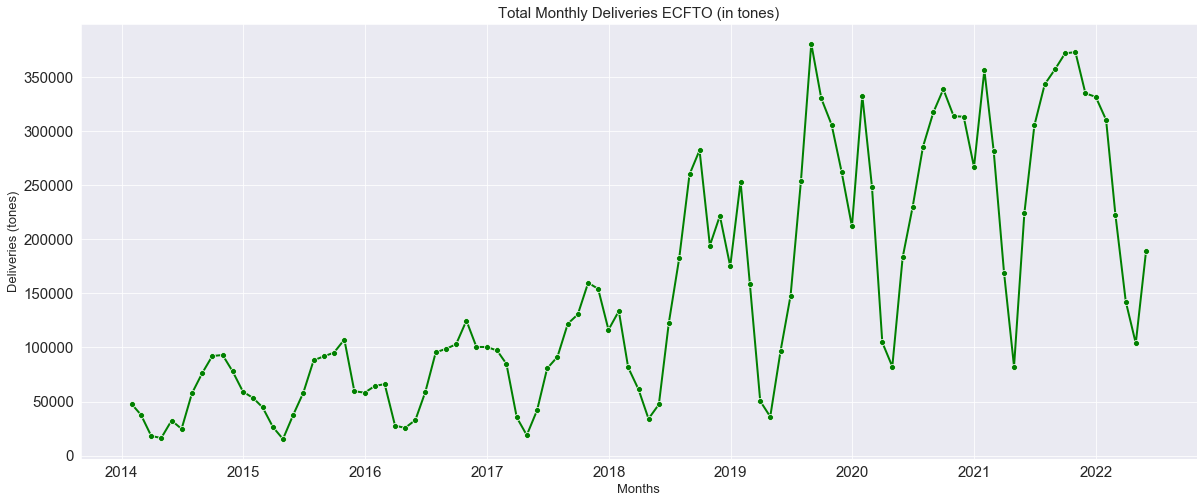

In [317]:
plt.rc("figure",figsize=(20,8))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style('darkgrid')
mDeliveries = sns.lineplot(data = dm1, x=dm1.index, y = dm1['Deliveries'], color = 'green', marker = 'o')
mDeliveries.set_title('Total Monthly Deliveries ECFTO (in tones)', fontsize = 15)
mDeliveries.set_ylabel('Deliveries (tones)', fontsize = 13)
mDeliveries.set_xlabel('Months', fontsize = 13)
plt.show()

# Divisão em Base de Treino e Base de Testes

In [456]:
#Base Histórica para treino do modelo
treino = dm1[:-12]
#Base Histórica para teste do modelo
teste = dm1[-12:]

# Análise de Componentes de Série Temporal

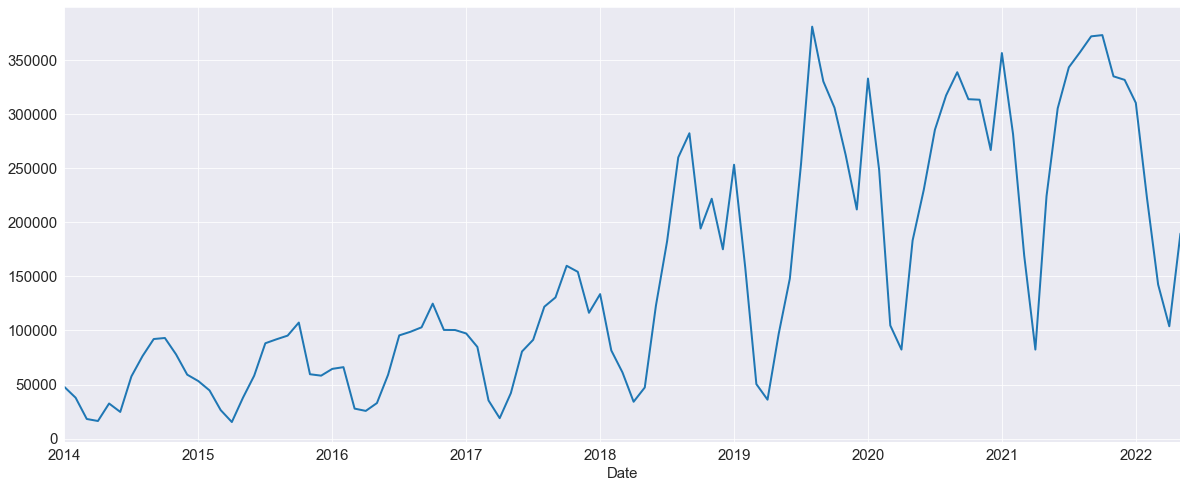

In [457]:
results = seasonal_decompose(dm1)
results.observed.plot()

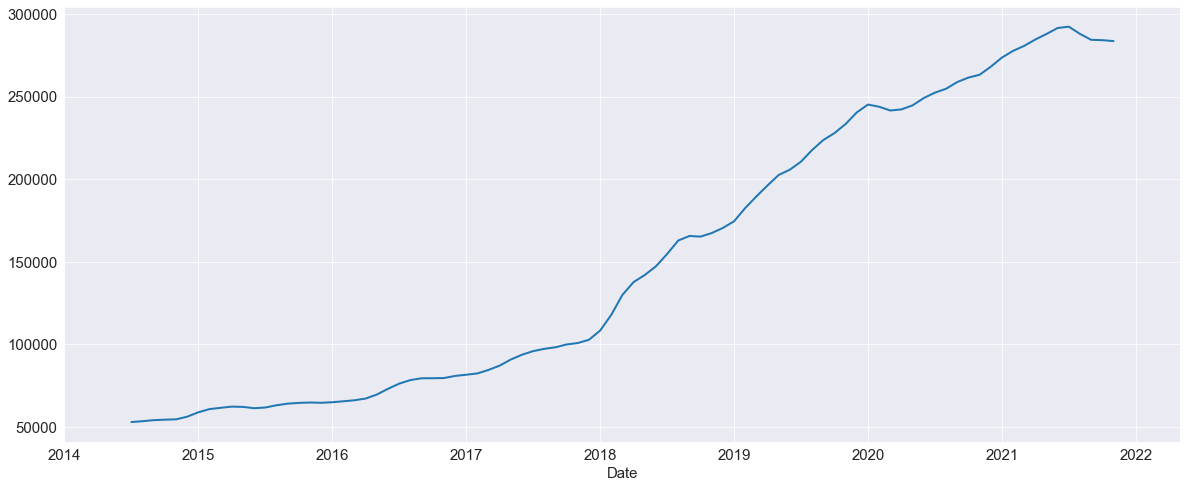

In [458]:
results.trend.plot()

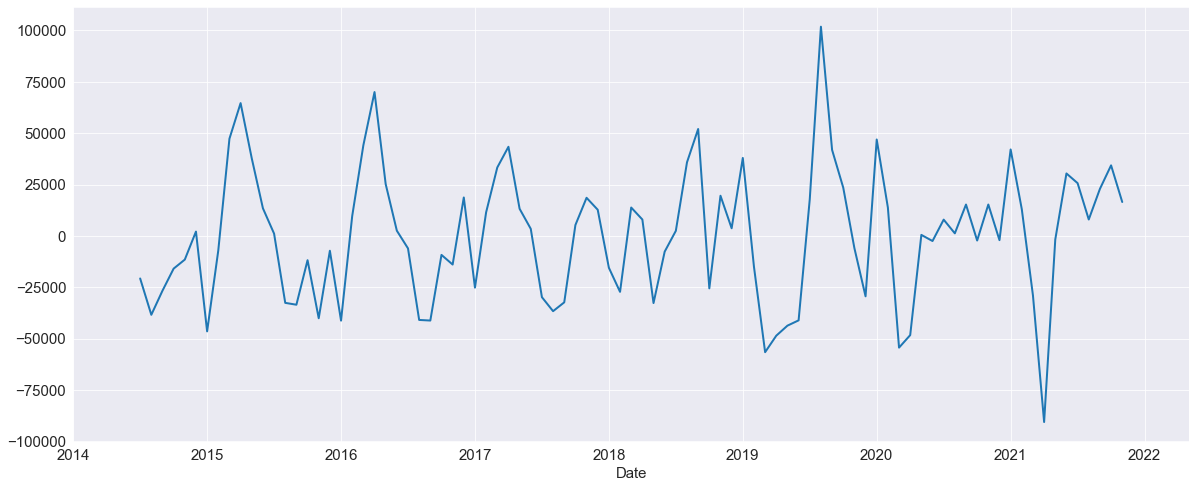

In [459]:
results.resid.plot()

# Padronização de Dados

In [460]:
scaler = MinMaxScaler()

In [461]:
scaler.fit(treino)

MinMaxScaler()

In [462]:
scaled_train = scaler.transform(treino)
scaled_test = scaler.transform(teste)

In [463]:
print(scaled_train.min(),scaled_train.max())

0.0 1.0


In [464]:
print(scaled_test.min(),scaled_test.max())

0.24220123421395146 0.9786970528088266


## Gerador de Séries Temporais

In [465]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [466]:
# defina o gerador
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [467]:
len(scaled_train)

89

In [468]:
len(generator)

87

In [469]:
# Vamos redefinir lotes de tamanho 7 para o procedimento iterativo
# Veja mais informações sobre o tamanho do lote http://deeplearningbook.com.br/o-efeito-do-batch-size-no-treinamento-de-redes-neurais-artificiais/

n_input = 7
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=2)

In [470]:
# Qual é a aparência do primeiro lote?
X,y = generator[0]

In [471]:
print(f'Dado o array: \n{X.flatten()}');
print(f'Previsão: \n {y}');

Dado o array: 
[0.08862306 0.0615356  0.00770582 0.00261479 0.04687068 0.02557914
 0.11546298 0.0615356  0.00770582 0.00261479 0.04687068 0.02557914
 0.11546298 0.16697608]
Previsão: 
 [[0.16697608]
 [0.20996416]]


In [472]:
### Pacote ideal do tensorflow = 2.5
### Pacote ideal do keras = 2.6
### Caso necessário, instale o pacote nessas versões

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [473]:
Sequential

keras.engine.sequential.Sequential

In [474]:
# Defina o modelo
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [475]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100)               40800     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [476]:
# Ajuste do modelo

model.fit(generator,epochs=250)

Epoch 1/250
41/41 [==============================] - 1s 4ms/step - loss: 0.1033
Epoch 2/250
41/41 [==============================] - 0s 3ms/step - loss: 0.0511
Epoch 3/250
41/41 [==============================] - 0s 3ms/step - loss: 0.0533
Epoch 4/250
41/41 [==============================] - 0s 3ms/step - loss: 0.0527
Epoch 5/250
41/41 [==============================] - 0s 3ms/step - loss: 0.0461
Epoch 6/250
41/41 [==============================] - 0s 3ms/step - loss: 0.0486
Epoch 7/250
41/41 [==============================] - 0s 3ms/step - loss: 0.0469
Epoch 8/250
41/41 [==============================] - 0s 3ms/step - loss: 0.0440
Epoch 9/250
41/41 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 10/250
41/41 [==============================] - 0s 3ms/step - loss: 0.0416
Epoch 11/250
41/41 [==============================] - 0s 3ms/step - loss: 0.0402
Epoch 12/250
41/41 [==============================] - 0s 3ms/step - loss: 0.0421
Epoch 13/250
41/41 [=================

In [477]:
model.history.history.keys()

dict_keys(['loss'])

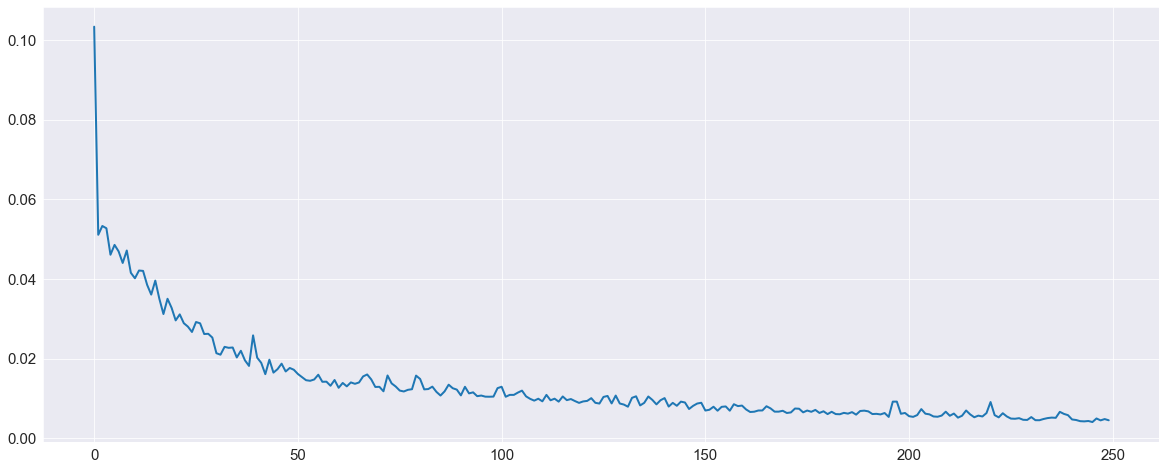

In [478]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [479]:
# Vejamos passo a passo como é feita a previsão, a princípio para a próxima observação usando o tamanho do lote igual a 7

first_eval_batch = scaled_train[-7:]

In [480]:
first_eval_batch

array([[0.81526531],
       [0.68798374],
       [0.93328912],
       [0.72826449],
       [0.42087436],
       [0.18328639],
       [0.57147262]])

In [481]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [482]:
model.predict(first_eval_batch)

array([[0.7032399]], dtype=float32)

In [483]:
scaled_test[0]

array([0.79338639])

In [484]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [485]:
current_batch.shape

(1, 7, 1)

In [486]:
current_batch

array([[[0.81526531],
        [0.68798374],
        [0.93328912],
        [0.72826449],
        [0.42087436],
        [0.18328639],
        [0.57147262]]])

In [487]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.68798374],
        [ 0.93328912],
        [ 0.72826449],
        [ 0.42087436],
        [ 0.18328639],
        [ 0.57147262],
        [99.        ]]])

In [488]:
# Agora vamos considerar as previsões para as próximas 21 observações e comparar com a base de teste

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(teste)):
    
    # obter a previsão de tempo 1 antecipadamente ([0] é para pegar apenas o número em vez de [array])
    current_pred = model.predict(current_batch)[0]
    
    # predição
    test_predictions.append(current_pred) 
    
    # atualize a rodada para agora incluir a previsão e descartar o primeiro valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [489]:
test_predictions

[array([0.7032399], dtype=float32),
 array([0.78904617], dtype=float32),
 array([0.9142359], dtype=float32),
 array([0.90662396], dtype=float32),
 array([0.82799715], dtype=float32),
 array([0.8253765], dtype=float32),
 array([0.8625892], dtype=float32),
 array([0.84194165], dtype=float32),
 array([0.66560775], dtype=float32),
 array([0.30380616], dtype=float32),
 array([0.20834595], dtype=float32),
 array([0.57334024], dtype=float32)]

In [490]:
scaled_test

array([[0.79338639],
       [0.89726585],
       [0.9353995 ],
       [0.97556371],
       [0.97869705],
       [0.87443092],
       [0.86546028],
       [0.80730607],
       [0.56688845],
       [0.34776054],
       [0.24220123],
       [0.47668557]])

In [491]:
true_predictions = scaler.inverse_transform(test_predictions)

In [492]:
true_predictions

array([[272303.09010846],
       [303658.80910581],
       [349406.21917417],
       [346624.63219038],
       [317892.45719441],
       [316934.8116862 ],
       [330533.23850427],
       [322988.12364071],
       [258551.36856737],
       [126340.14789112],
       [ 91456.63552135],
       [224834.5449147 ]])

In [493]:
# Possivelmente encontraremos warnings aqui
teste['Predictions'] = true_predictions

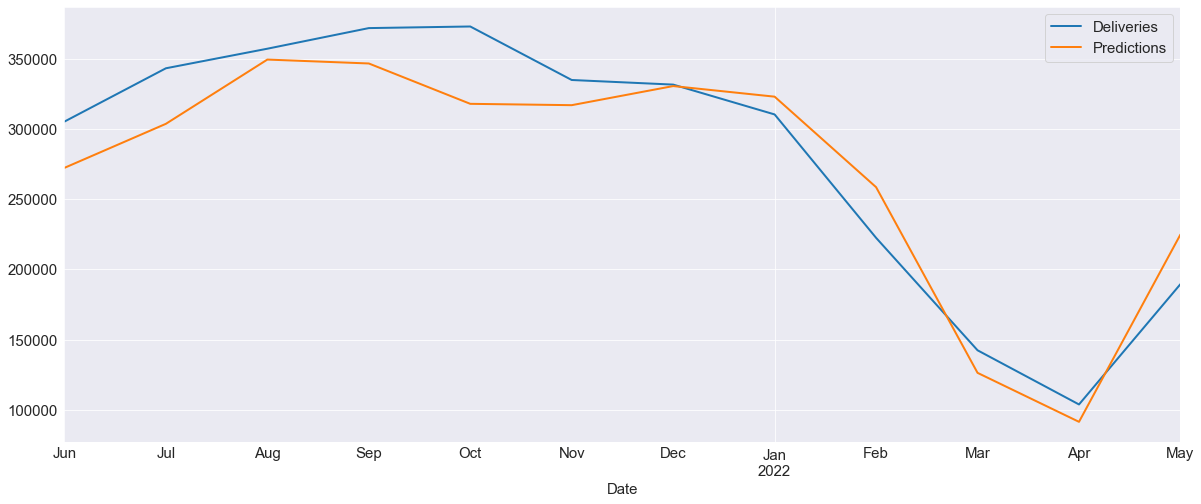

In [494]:
teste.plot()

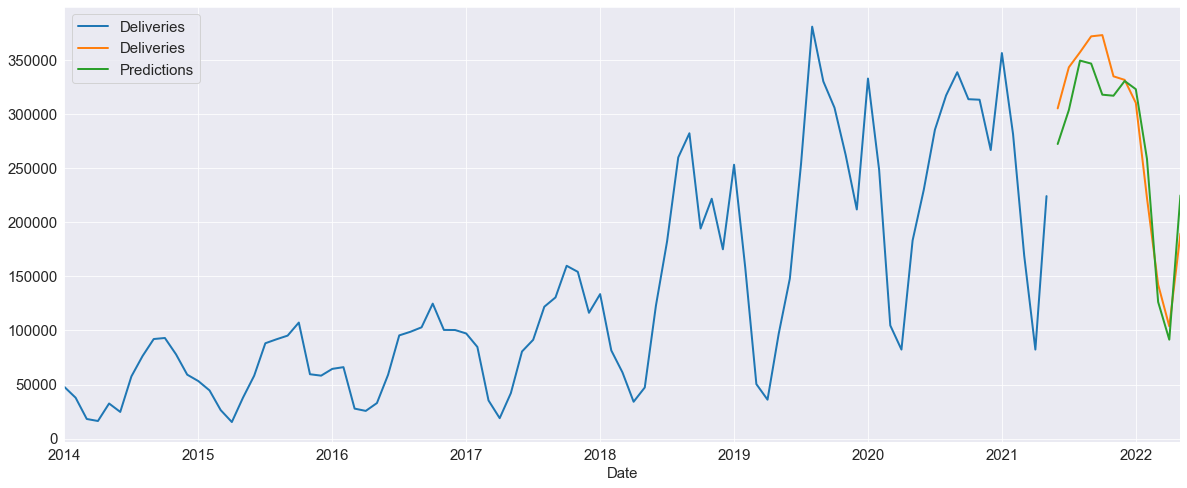

In [495]:
ax = treino.plot()
teste.plot(ax=ax)

In [496]:
MAPE = round(100*mean_absolute_percentage_error(teste['Deliveries'],teste['Predictions']),2)
print(f'Mean Absolute Percentage Error MAPE = {MAPE}%')

Mean Absolute Percentage Error MAPE = 9.48%
